<a href="https://colab.research.google.com/github/ev1025/DA_Study/blob/main/Tableau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 태블로

[실습자료](https://public.tableau.com/app/profile/.21716891)

- Data Literacy : 데이터를 보고 활용할 수 있는 능력
- 탐색을 통해 자신이 이해하고 대화와 협업을 통해 찾은 현상과 통찰 공유

**측정값, 연속형(초록색 #)**
- 숫자형식
- 드로그앤 드롭, 더블클릭으로 차트를 만듬
- 설정된 집계(합계, 평균 등..)에 따라 차트를 만들게 된다.
- 색상을 입히면 그라데이션 범례

**차원, 불연속형(파란색)**
- 측정값으로 만들어진 차트를 어떻게 나눌 것인지
- 색상을 입히면 분류해주는 범례

In [ ]:
# 계산식필드(매출합이 평균보다 크면 True 작으면 False)
SUM(매출) >= WINDOW_AVG(SUM(매출))

// 매출이 평균이상 == True
// 매출이 평귱미만 == False

In [ ]:
# IF문(연도가 2021년이면 매출을 가져온다)
IF YEAR([연도]) = 2021 THEN [매출] END

# IIF문(시도가 서울시이면 매출을 가져오고 아니면 NULL)
IIF([시도]='서울시',[매출],NULL)

# 측정값이 NULL이면 값으로 표현
IFNULL(측정값, 값)

In [ ]:
# 매개변수(화면에 표시되는 카테고리값)을 측정값과 연결시킬 때
CASE 매개변수
WHEN 조건 THEN 값
ELSE 값 END 

In [ ]:
# 날짜 정수로 추출
year(date타입)

# 날짜차원의 값을 정수로 뽑기
DATEPART('year',날짜차원)
DATEPART('month',날짜차원)

# str을 날짜형식으로
DATEPARSE('yyyyMM', '202201') # '표시형식', '문자열'

# 날짜차이(정수로 추출)
DATEDIFF('month', 시작달, 끝달) # 끝달 - 시작달 몇개월 차이인지

---

**[테이블 계산함수](https://help.tableau.com/current/pro/desktop/ko-kr/functions_functions_tablecalculation.htm)**

- 태블로의 인덱스는 1부터 시작


In [1]:
import pandas as pd
df = pd.DataFrame({'index':(1,2,3,4,5,6)})
df

,index
0,1
1,2
2,3
3,4
4,5
5,6


**FIRST()**
- 첫번째 행에서 현재 행까지의 행수
- 인덱스3에서의 FIRST() 값은 -2

**LAST()** 
- 현재행에서 마지막 행까지 수
- 인덱스 3에서 LAST() 값은 3

**INDEX()**
- 값의 정렬없이 현재 순서대로 인덱스 부여

**WINDOW_AVG(측정값, [시작, 끝])**
- 해당 계산값의 시작값부터 끝값까지의 평균
- Default는 전체값
- 평균 이상값 조건으로 쓸 때 : 측정값 > WINDOW_AVG(측정값)

---

**라인차트**
- 시간순서에 따른 추세를 보는데 적합
- 날짜유형
   - 예시 : 2020년 ~ 2023년 날짜자료를 월별로 선택하면
   - 불연속형 : 각 월의 평균값 (12개)
   - 연속형 : 각 년도의 월별 평균값(36개)

- 날짜별 순서대로 경로를 만들고 싶을 때 (이진우의 매출 : 1분기 ->2분기->3분기)
   - 마크를 라인으로 변경
   - 구분할 차원을 세부정보에 넣기(고객명, 지역 등..)
   - 마크에 불연속형날짜 레이블에 넣기(순서 정할 날짜 일자별로 나눌건지, 월별로 나눌건지)
   - 마크에 INDEX()함수 생성, 경로로 변경

   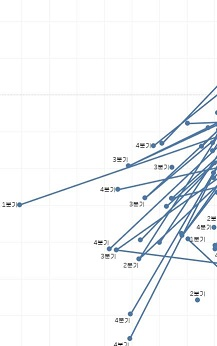

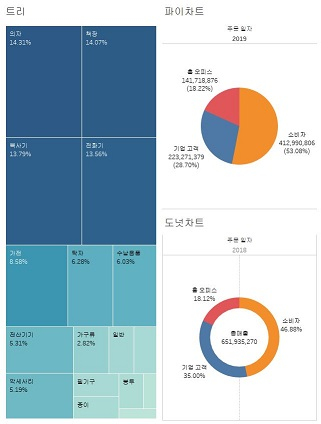

**태블로 성능 높이기**
1. 마크 수 줄이기(고객명 다 나오게 한다던지..)
2. 필터 수 최소화(필터가 많을 수록 느려짐, 계산필드 iif(계산필드(필터에들어갈bool), 참, 거짓)
3. 대시보드 개수는 하나에 3~4개로 제한

**아이콘 삽입** :
내 문서 > 내 Tableau 리포지토리 > 모양 > 새폴더 만들어서 사용